***
*Course:* [Math 535](https://people.math.wisc.edu/~roch/mmids/index.html) - Mathematical Methods in Data Science (MMiDS)  
*Author:* [Sebastien Roch](https://people.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
*Updated:* Jan. 25, 2023   
*Copyright:* &copy; 2022 Sebastien Roch
***
Updated by Hanbaek Lyu 



# Chapter 1 - Introduction and review

## 1.3 Clustering: an objective, an algorithm and a guarantee

Consider the following fundamental problem in data science. We are given $n$ vectors $\mathbf{x}_1,\ldots,\mathbf{x}_n$ in $\mathbb{R}^d$. Our goal is to find a good <a href="https://en.wikipedia.org/wiki/Cluster_analysis">clustering</a>: loosely speaking, we want to partition these data points into $k$ disjoint subsets - or clusters - with small pairwise distances within clusters and large pairwise distances across clusters. 

To make this rather vague problem more precise, we consider a specific objective function known as the $k$-means objective. Our approach here will be typical of how one might approach a mathematical data science problem. We will first formulate the problem as an optimization problem, then derive an algorithm to solve it, and finally provide some rigorous guarantees about the output.

![clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/320px-Cluster-2.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:Cluster-2.svg))

But first, we need to define precisely what we are trying to extract from the data. What is the mathematical structure of the solution sought? Fix a number of clusters $k$. Formally, we define a clustering as a partition.

**Definition (Partition):** A partition of $[n] = \{1,\ldots,n\}$ of size $k$ is a collection of non-empty subsets $C_1,\ldots,C_k \subseteq [n]$ that:
- are pairwise disjoint, i.e., $C_i \cap C_j = \emptyset$, $\forall i \neq j$
- cover all of $[n]$, i.e., $\cup_{i=1}^k C_i = [n]$. $\lhd$

**Example:** Suppose we are given $8$ data points in $\mathbb{R}^2$ as follows:

$$
\begin{align*}
&\mathbf{x}_1 = \begin{pmatrix}1\\0\end{pmatrix},
\mathbf{x}_2 = \begin{pmatrix}-2\\0\end{pmatrix},
\mathbf{x}_3 = \begin{pmatrix}-2\\1\end{pmatrix},
\mathbf{x}_4 = \begin{pmatrix}1\\-3\end{pmatrix},\\
&\mathbf{x}_5 = \begin{pmatrix}-10\\10\end{pmatrix},
\mathbf{x}_6 = \begin{pmatrix}2\\-2\end{pmatrix},
\mathbf{x}_7 = \begin{pmatrix}-3\\1\end{pmatrix},
\mathbf{x}_8 = \begin{pmatrix}3\\-1\end{pmatrix}.
\end{align*}
$$

So here $n=8$ and $d = 2$. Assume we look for $k = 3$ clusters. Then a valid clustering would be for instance:

$$
C_1 = \{1, 4, 6, 8\}, C_2 = \{2, 3, 7\}, C_3 = \{5\},
$$

which corresponds to assigning data points $\mathbf{x}_1, \mathbf{x}_4, \mathbf{x}_6, \mathbf{x}_8$ to the first cluster, data points $\mathbf{x}_2, \mathbf{x}_3, \mathbf{x}_7$ to the second cluster and data point $\mathbf{x}_5$ to the third cluster. Note in particular that the sets $C_1, C_2, C_3$ satisfy the conditions of a partition, i.e., they are disjoint and cover all of $[8] = \{1,2,\ldots,8\}$. Or put differently, each data point is assigned to one and exactly one cluster. $\lhd$

**Remark:** We number the clusters $C_1,\ldots,C_k$ for notational convenience, but their order is meaningless. Two partitions are the same if they are the same family of subsets. E.g., in the previous example, 
$C_1 = \{1, 4, 6, 8\}, C_2 = \{2, 3, 7\}, C_3 = \{5\}$ and $C_1 = \{5\}, C_2 = \{1, 4, 6, 8\}, C_3 = \{2, 3, 7\}$ are equivalent clusterings.  $\lhd$

### 1.3.1 The $k$-means objective

Under the $k$-means objective, the "cost" of $C_1,\ldots,C_k$ is then defined as

$$
\mathcal{G}(C_1,\ldots,C_k) = \min_{\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k \in \mathbb{R}^d} 
\sum_{i=1}^k \sum_{j \in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2.
$$

Here $\boldsymbol{\mu}_i \in \mathbb{R}^d$ is the representative - or center - of cluster $C_i$. Note that $\boldsymbol{\mu}_i$ need not be one of the $\mathbf{x}_j$'s.

Our goal is to find a partition $C_1,\ldots,C_k$ that minimizes $\mathcal{G}(C_1,\ldots,C_k)$, i.e., solves the problem

$$
\min_{C_1,\ldots,C_k} \mathcal{G}(C_1,\ldots,C_k)
$$

over all partitions of $[n]$ of size $k$.

To quote [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis#Centroid-based_clustering):

> In centroid-based clustering, clusters are represented by a central vector, which may not necessarily be a member of the data set. When the number of clusters is fixed to k, k-means clustering gives a formal definition as an optimization problem: find the k cluster centers and assign the objects to the nearest cluster center, such that the squared distances from the cluster are minimized.

![k-means](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/KMeans-density-data.svg/239px-KMeans-density-data.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:KMeans-density-data.svg))

In general, the problem is <a href="https://en.wikipedia.org/wiki/NP-hardness">NP-hard</a>, that is, roughly speaking no "fast" algorithm is expected to exist to solve it. The $k$-means algorithm is a popular heuristic. It is based on the idea that the following two sub-problems are easy to solve: 

1. finding the optimal representatives for a fixed partition;
2. finding the optimal partition for a fixed set of representatives.

One then alternates between the two (perhaps until progress falls below a tolerance). This is reasonable since our goal, as we pointed out above, is to solve the minimization problem

$$
\min_{C_1,\ldots,C_k} \min_{\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k \in \mathbb{R}^d} 
\sum_{i=1}^k \sum_{j \in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2
$$

where $C_1,\ldots,C_k$ ranges over all partitions of $[n]$ of size $k$. Fixing partition $C_1,\ldots,C_k$ and miniminizing over $\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k \in \mathbb{R}^d$ corresponds to solving the first problem above, while fixing $\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k \in \mathbb{R}^d$ and miniminizing over partitions $C_1,\ldots,C_k$ corresponds to solving the second problem.

#### 1.3.1.1 A useful observation: minimizing a quadratic function

To elaborate on the first step above, we review an elementary fact about [quadratic functions](https://en.wikipedia.org/wiki/Quadratic_function).

Consider the function

$$q(x) = a x^2 + b x + c.$$

When $a > 0$, $q$ has a unique minimum. 

***

**Lemma (Minimum of a Quadratic Function):** Let $q(x) = a x^2 + b x + c$ where $a > 0$ and $x \in \mathbb{R}$. The unique global minimum of $q$ is attained at 

$$
x^* = -\frac{b}{2a}.
$$

***

*Proof:* By the *First-Order Necessary Condition*, a global minimizer of $q$ (which is necessarily a local minimizer) satisfies the condition

$$
\frac{\mathrm{d}}{\mathrm{d}x} q(x) = 2 a x + b = 0,
$$

whose unique solution is 

$$
x^*= -\frac{b}{2a}.
$$ 

To see that $x^*$ is indeed a global minimizer, we re-write $q$ as

$$
\begin{align*}
q(x) 
&= a \left(x^2 + 2 \left[\frac{b}{2a}\right] x\right) + c\\
&= a \left(x^2 + 2 \left[\frac{b}{2a}\right] x + \left[\frac{b}{2a}\right]^2\right) - a \left[\frac{b}{2a}\right]^2 + c\\
&= a (x - x^*)^2 + \left[c - \frac{b^2}{4a}\right].
\end{align*}
$$ 

Clearly, any other $x$ gives a higher value for $q$. The step on the second line above is called [*Completing the Square*](https://en.wikipedia.org/wiki/Completing_the_square). $\square$

**NUMERICAL CORNER:** Here's a numerical example.

In [8]:
# Python 3
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def q(a,b,c,x):
    return a * (x**2) + b * x + c

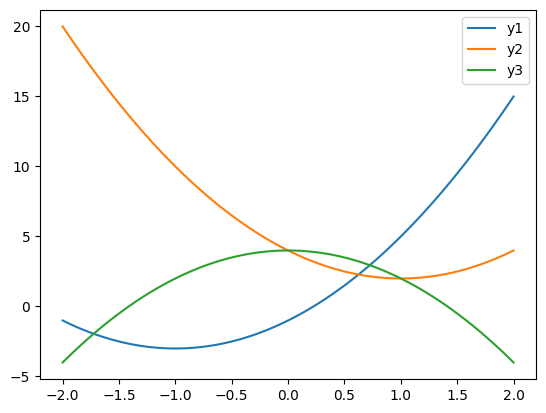

In [10]:
x = np.linspace(-2, 2, 100)

plt.plot(x, q(2,4,-1,x))
plt.plot(x, q(2,-4,4,x))
plt.plot(x, q(-2,0,4,x))

plt.legend(['y1', 'y2', 'y3'])

plt.show()

#### 1.3.1.2 Sub-problem 1: finding the optimal representatives

We denote by $|C_i|$ the number of elements in $C_i$.

**Example (continued):** Continuing the example above, the sizes of the clusters are respectively $|C_1| = 4, |C_2| = 3, |C_3| = 1$. Note in particulat that $|C_1| + |C_2| + |C_3| = 8 = n$, as follows from the fact that $C_1, C_2, C_3$ is a partition. $\lhd$

***

<b>Lemma (Optimal Representatives):</b> Fix a partition $C_1,\ldots,C_k$. The optimal representatives under the objective 

$$
\begin{align*}
G(C_1,\ldots,C_k; \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_k)
&= \sum_{i=1}^k \sum_{j \in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2,
\end{align*}
$$

are the centroids

$$
\boldsymbol{\mu}_i^* = \frac{1}{|C_i|} \sum_{j\in C_i} \mathbf{x}_j.
$$

***

*Proof idea:* The objective $G$ can be written as a sum, where each term is a quadratic function in one component of one of the $\boldsymbol{\mu}_i$'s. Each of these terms is minimized by the average of the corresponding components of the $\mathbf{x}_j$'s belonging $C_i$.

**Example (continued):** Continuing with the previous example, we compute the optimal representatives for the fixed partition $C_1, C_2, C_3$ above. We get

$$
\begin{align*}
\boldsymbol{\mu}_1^*
&= \frac{1}{4}[\mathbf{x}_1 + \mathbf{x}_4 + \mathbf{x}_6 + \mathbf{x}_8]\\
&= \frac{1}{4}\left[\begin{pmatrix}1\\0\end{pmatrix} +
\begin{pmatrix}1\\-3\end{pmatrix} +
\begin{pmatrix}2\\-2\end{pmatrix} +
\begin{pmatrix}3\\-1\end{pmatrix}
\right]
= \begin{pmatrix}7/4\\-3/2\end{pmatrix},\\
\boldsymbol{\mu}_2^*
&= \frac{1}{3}[\mathbf{x}_2 + \mathbf{x}_3 + \mathbf{x}_7]\\
&= \frac{1}{3}\left[\begin{pmatrix}-2\\0\end{pmatrix}+
\begin{pmatrix}-2\\1\end{pmatrix}+
\begin{pmatrix}-3\\1\end{pmatrix}
\right]
= \begin{pmatrix}-7/3\\2/3\end{pmatrix},\\
\boldsymbol{\mu}_3^*
&= \frac{1}{1}[\mathbf{x}_5]
= \begin{pmatrix}-10\\10\end{pmatrix}.
\end{align*}
$$

$\lhd$

*Proof (Optimal Representatives):* Using the notation $\mathbf{x}_j = (x_{j1},\ldots,x_{jd})^T$ and similarly for $\boldsymbol{\mu}_i$, note that we can expand the $k$-means objective as

$$
\begin{align*}
\sum_{i=1}^k \sum_{j \in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2
&= \sum_{i=1}^k \sum_{j \in C_i} \sum_{m=1}^d (x_{jm} - \mu_{im})^2\\
&= \sum_{i=1}^k \sum_{m=1}^d \left[\sum_{j \in C_i} (x_{jm} - \mu_{im})^2\right].
\end{align*}
$$

The expression in square brackets is a quadratic function in $\mu_{im}$

$$
q_{im}(\mu_{im})
= \left\{\sum_{j \in C_i} x_{jm}^2\right\} + \left\{- 2 \sum_{j \in C_i} x_{jm}\right\} \mu_{im}  + \left\{|C_i| \right\} \mu_{im}^2,
$$

and therefore, by the formula for the *Minimum of a Quadratic Function*, 
is minimized at 

$$
\mu_{im}^* 
= - \frac{- 2 \sum_{j \in C_i} x_{jm}}{2 |C_i|}
= \frac{1}{|C_i|} \sum_{j \in C_i} x_{jm}.
$$

Since each term $q_{im}(\mu_{im})$ in the sum over $i, m$ making up the objective function $G$ is strictly minimized at $\boldsymbol{\mu}_1^*,\ldots, \boldsymbol{\mu}_k^*$, so is $G$. $\square$

#### 1.3.1.3 Sub-problem 2: finding the optimal partition

Given $n$ vectors $\mathbf{x}_1,\ldots,\mathbf{x}_n$ in $\mathbb{R}^d$ and a partition $C_1, \ldots, C_k \subseteq [n]$, it will be useful to have some notation for the corresponding cluster assignment: we define $c(j) = i$ if $j \in C_i$.

**Example (continued):** Continuing the example above, the clusters
$
C_1 = \{1, 4, 6, 8\}, C_2 = \{2, 3, 7\}, C_3 = \{5\}
$
correspond to the assignment 

$$
c(1) = 1, c(2) = 2, c(3) = 2, c(4) = 1, c(5) = 3, c(6) = 1, c(7) = (2), c(8) = 1. 
$$

$\lhd$

***

**Lemma (Optimal Clustering):** Fix the representatives $\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k$. An optimal partition under  the objective

$$
\begin{align*}
G(C_1,\ldots,C_k; \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_k)
&= \sum_{i=1}^k \sum_{j \in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2,
\end{align*}
$$



is obtained as follows. For each $j$, find the $\boldsymbol{\mu}_i$ that minimizes $\|\mathbf{x}_j - \boldsymbol{\mu}_i\|$ (picking one arbitrarily in the case of ties) and assign $\mathbf{x}_j$ to $C_i$. 

***

*Proof:* If $c$ is the cluster assignment associated to $C_1,\ldots,C_k$, then we can re-write the objective as


$$
\begin{align*}
\sum_{i=1}^k \sum_{j \in C_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2
= \sum_{j=1}^n \|\mathbf{x}_j - \boldsymbol{\mu}_{c(j)}\|^2,
\end{align*}
$$

By definition, when the $\boldsymbol{\mu}_i$'s are fixed, each term in the sum on the right-hand side is minimized separately by the assignment in the statement. Hence so is the sum itself. Note that we used the fact that the square root is non-decreasing to conclude that minimizing $\|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2$ or its square root $\|\mathbf{x}_j - \boldsymbol{\mu}_i\|$ are equivalent. $\square$

**Example (continued):** Continuing the example above, suppose that we choose representatives 

$$
\boldsymbol{\mu}_1 = \begin{pmatrix}-2\\1\end{pmatrix},
\boldsymbol{\mu}_2 = \begin{pmatrix}2\\-1\end{pmatrix},
\boldsymbol{\mu}_3 = \begin{pmatrix}-10\\10\end{pmatrix}.
$$

Then we find the cluster assignment of $\mathbf{x}_1$ by computing its squared distance to each representative:

$$
\|\mathbf{x}_1 - \boldsymbol{\mu}_1\|
= \left\|\begin{pmatrix}1\\0\end{pmatrix} - \begin{pmatrix}-2\\1\end{pmatrix}\right\|
= \sqrt{(1-(-2))^2 + (0-1)^2}
= \sqrt{10},
$$
$$
\|\mathbf{x}_1 - \boldsymbol{\mu}_2\|
= \left\|\begin{pmatrix}1\\0\end{pmatrix} - \begin{pmatrix}2\\-1\end{pmatrix}\right\|
= \sqrt{(1-2)^2 + (0-(-1))^2}
= \sqrt{2},
$$
$$
\|\mathbf{x}_1 - \boldsymbol{\mu}_3\|
= \left\|\begin{pmatrix}1\\0\end{pmatrix} - \begin{pmatrix}-10\\10\end{pmatrix}\right\|
= \sqrt{(1-(-10))^2 + (0-10)^2}
= \sqrt{221}.
$$

The minimum is achieved for $\boldsymbol{\mu}_2$ so we assign $\mathbf{x}_1$ to $C_2$, i.e., $1 \in C_2$ and $c(1) = 2$. $\lhd$

### 1.3.2 The $k$-means algorithm and its analysis

We are now ready to describe the <a href="https://en.wikipedia.org/wiki/K-means_clustering">$k$-means algorithm</a>, also known as Lloyd's algorithm. We start from a random assignment of clusters. (An alternative [initialization strategy](https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods) is to choose $k$ representatives at random among the data points.) We then alternate between the optimal choices in the lemmas. In lieu of pseudo-code, we write out the algorithm in Python. 

The input `X` is assumed to be a collection of $n$ vectors $\mathbf{x_1}, \ldots, \mathbf{x}_n \in \mathbb{R}^d$ stacked into a matrix, with one row for each data point. The other input, `k`, is the desired number of clusters. There is an optional input `maxiter` for the maximum number of iterations, which is set to $10$ by default.

We first define separate functions for the two main steps. To find the minimum of an array, we use the function [`numpy.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html). We also use [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) to compute the Euclidean distance.

In [1]:
from numpy import linalg as LA

In [2]:
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]             
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

In [3]:
def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

The main function follows. Below, `rng.integers(0,k,n)` is an array of `n` uniformly chosen integers between `0` and `k-1` (inclusive). (See [random.Generator.integers](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html) for details.)

In [11]:
from numpy.random import default_rng
rng = default_rng(535)

In [12]:
def mmids_kmeans(X, k, maxiter=10):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign) 
        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps) 
    return assign

**NUMERICAL CORNER:** We apply our implementation of $k$-means to the example above. We fix `k` to $3$. Here the data matrix `X` is the following:

In [16]:
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],[-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])

95.46000000000002
12.500000000000004
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334


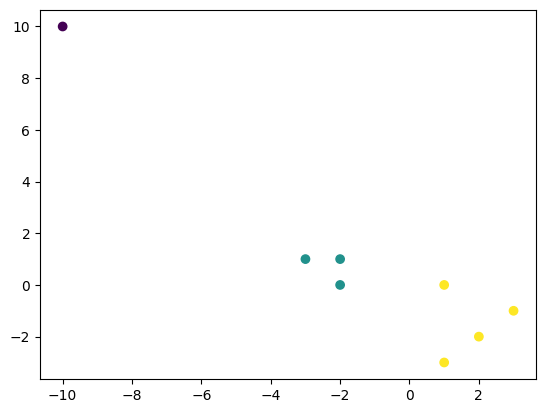

In [17]:
assign = mmids_kmeans(X, 3)
plt.scatter(X[:,0], X[:,1], c=assign)
plt.show()

We can compute the final representatives (optimal for the final assignment) by using the subroutine `opt_reps`.

In [18]:
opt_reps(X, 3, assign)

array([[-10.        ,  10.        ],
       [ -2.33333333,   0.66666667],
       [  1.75      ,  -1.5       ]])

Each row is the center of the corresponding cluster. Note these match with the ones we previously computed. Indeed, the clustering is the same (although not necessarily in the same order).

$\lhd$

The $k$-means algorithm is only a heuristic. In particular, it is not guaranteed to find the global minimum of the $k$-means objective. However, it is guaranteed to improve the objective at every iteration, or more precisely, not to make it worse.

***

**Theorem (Convergence of $k$-means cost):** The sequence of objective function values produced by the $k$-means algorithm is non-increasing.

***

*Proof idea:* By the *Optimal Representatives* and *Optimal Clustering* lemmas, each step does not increase the objective.

*Proof:* Let $C_1',\ldots,C_k'$ be the current clusters, with representatives $\boldsymbol{\mu}_1',\ldots,\boldsymbol{\mu}_k'$. After Step 1, the new representatives are $\boldsymbol{\mu}_1'',\ldots,\boldsymbol{\mu}_k''$. By the *Optimal Representatives Lemma*, they satisfy

$$
\sum_{i=1}^k \sum_{j \in C_i'} \|\mathbf{x}_j - \boldsymbol{\mu}_i''\|^2
\leq \sum_{i=1}^k \sum_{j \in C_i'} \|\mathbf{x}_j - \boldsymbol{\mu}_i'\|^2.
$$

After Step 2, the new clusters are $C_1'',\ldots,C_k''$. By the *Optimal Clustering Lemma*, they satisfy

$$
\sum_{i=1}^k \sum_{j \in C_i''} \|\mathbf{x}_j - \boldsymbol{\mu}_i''\|^2
\leq \sum_{i=1}^k \sum_{j \in C_i'} \|\mathbf{x}_j - \boldsymbol{\mu}_i''\|^2.
$$

Combining these two inequalities gives

$$
\sum_{i=1}^k \sum_{j \in C_i''} \|\mathbf{x}_j - \boldsymbol{\mu}_i''\|^2
\leq \sum_{i=1}^k \sum_{j \in C_i'} \|\mathbf{x}_j - \boldsymbol{\mu}_i'\|^2,
$$

as claimed. $\square$

The sequence of objective values is monotone and bounded from below by $0$. [Hence it converges](https://en.wikipedia.org/wiki/Monotone_convergence_theorem#Convergence_of_a_monotone_sequence_of_real_numbers).

In fact, the previous result on convergence of $k$-means Algorithm is a consequence of the following general observation:

***

**Theorem (Convergence of Alternating Minimization):** Consider the following two-block optimization problem:
$$
\min_{x\in X,\, y\in Y} F(x,y),
$$
where the objective $F$ is bounded from below on the parameter space $X\times Y$. Consider the following Alternating Minimization algorithm: For $n=1,2,\dots, N$,
$$
\begin{cases}
x_{n}\leftarrow \min_{x\in X} F(x,y_{n-1})\\
y_{n}\leftarrow \min_{y\in Y} F(x_{n},y).
\end{cases}
$$
Then $F(x_{n},y_{n})$ is non-increasing in $n\ge 1$ and hence it converges as $n\rightarrow\infty$. 

***

*Proof:* By definition, we have 
$$
F(x_{n},y_{n}) \le F(x_{n}, y_{n-1}) \le F(x_{n-1}, y_{n-1}).
$$

### 1.3.3 Iris dataset

We will test our implementation of $k$-means on the iris dataset introduced earlier in the chapter.

In [24]:
# IF RUNNING ON GOOGLE COLAB
# When prompted, upload: 
#     * iris-measurements.csv 
#     * iris-species.csv
# from your local file system
# Data source: https://www.math.wisc.edu/~roch/mmids/
# Alternative instructions: https://colab.research.google.com/notebooks/io.ipynb

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

We first extract the columns and combine them into a data matrix `X`, then visualize the $2$-dimensional petal data.

In [25]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
#df = pd.read_csv('iris-measurements.csv')
#df.head()

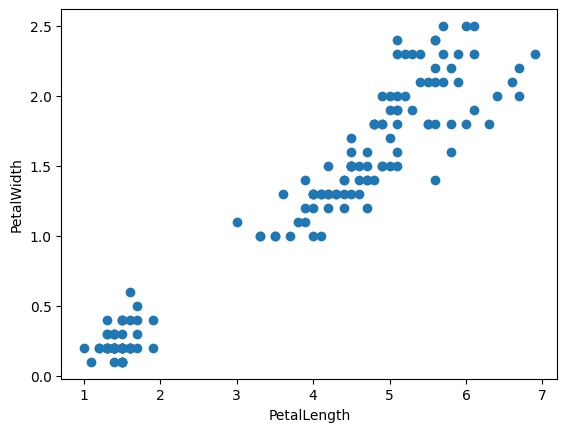

In [26]:
df = pd.read_csv("iris-measurements.csv")
X = df[['PetalLengthCm', 'PetalWidthCm', 
        'SepalLengthCm', 'SepalWidthCm']].to_numpy()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

We run the $k$-means algorithm with $k=2$ clusters. 

619.3333916488605
156.3092374333162
152.53336910043726
152.36870647733906
152.36870647733906
152.36870647733906
152.36870647733906
152.36870647733906
152.36870647733906
152.36870647733906


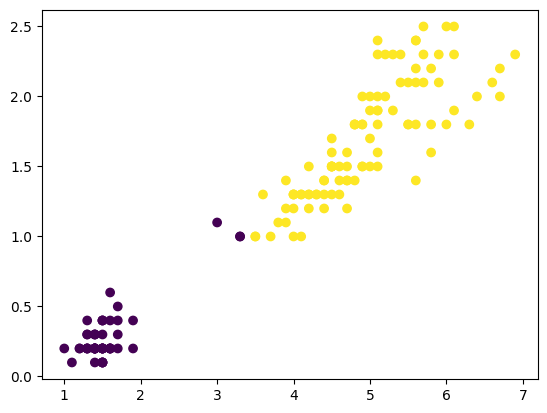

In [27]:
assign = mmids_kmeans(X, 2)
plt.scatter(X[:,0], X[:,1], c=assign)
plt.show()

This clustering may seem less than perfect. But recall that 

(1) in this plot we are looking at only two of the four variables while $k$-means uses all of them, 

(2) we are not guaranteed to find the best solution, 

(3) our objective function is somewhat arbitrary, and 

(4) it is not clear what the right choice of $k$ is. In fact, the original dataset provided the correct answer as determined by a [botanist](https://en.wikipedia.org/wiki/Edgar_Anderson). 

Despite what the figure above may lead us to believe, there are in reality three separate species. So let's try with $k=3$ clusters.

In [28]:
assign = mmids_kmeans(X, 3, maxiter=20)

527.1586444636011
95.5719420067157
87.00356562736205
84.80172984452898
84.10217888865151
83.13638186876976
81.83900206772623
80.89577600000001
79.96297983461305
79.43376414532675
79.01070972222223
78.94506582597731
78.94506582597731
78.94506582597731
78.94506582597731
78.94506582597731
78.94506582597731
78.94506582597731
78.94506582597731
78.94506582597731


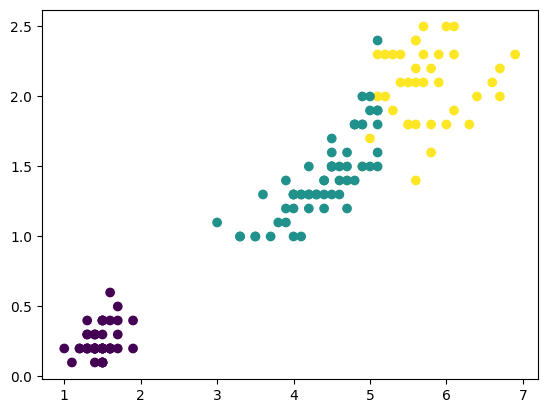

In [29]:
plt.scatter(X[:,0], X[:,1], c=assign)
plt.show()

Let's load the truth and compare.

In [30]:
df_truth = pd.read_csv("iris-species.csv")
df_truth.head()

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa


The species are:

In [31]:
species = df_truth['Species']
species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

To plot the outcome, we color the species blue-green-red using a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

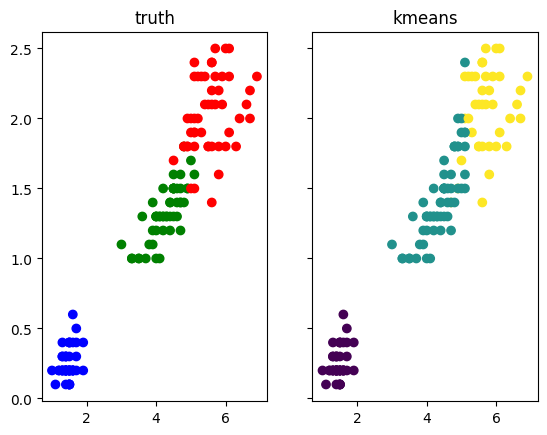

In [32]:
species2color = {'Iris-setosa': 'b', 'Iris-versicolor': 'g', 'Iris-virginica': 'r'}
truth = species.replace(species2color)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(X[:,0], X[:,1], c=truth)
ax1.set_title('truth')
ax2.scatter(X[:,0], X[:,1], c=assign)
ax2.set_title('kmeans')
plt.show()

Determining the appropriate number of clusters is not a straighforward problem. To quote [Wikipedia](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set):

> The correct choice of $k$ is often ambiguous, with interpretations depending on the shape and scale of the distribution of points in a data set and the desired clustering resolution of the user. In addition, increasing $k$ without penalty will always reduce the amount of error in the resulting clustering, to the extreme case of zero error if each data point is considered its own cluster (i.e., when $k$ equals the number of data points, $n$). Intuitively then, the optimal choice of $k$ will strike a balance between maximum compression of the data using a single cluster, and maximum accuracy by assigning each data point to its own cluster. If an appropriate value of $k$ is not apparent from prior knowledge of the properties of the data set, it must be chosen somehow. There are several categories of methods for making this decision.


In practice, [several heuristic approaches](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) are in use. Other approaches to clustering, e.g. [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) and [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering), do not require a number of clusters as input. 

$\lhd$

### 1.3.4 Matrix form of $k$-means clustering

In this section, we show that the $k$-means clustering objective can be written in matrix form. We start with some notation and definitions that will be useful throughout the course.

As we indicated before, for a collection of $n$ data vectors $\mathbf{x}_1, \ldots, \mathbf{x}_n$ in $\mathbb{R}^d$, it is often convenient to stack them up into a matrix

$$
X =
\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_n^T \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} \\
\end{bmatrix}.
$$

We can do the same with cluster representatives. Given $\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k$ also in $\mathbb{R}^d$, we form the matrix 

$$
U =
\begin{bmatrix}
\boldsymbol{\mu}_1^T \\
\boldsymbol{\mu}_2^T \\
\vdots \\
\boldsymbol{\mu}_k^T \\
\end{bmatrix}
=
\begin{bmatrix}
\mu_{11} & \mu_{12} & \cdots & \mu_{1d} \\
\mu_{21} & \mu_{22} & \cdots & \mu_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
\mu_{k1} & \mu_{k2} & \cdots & \mu_{kd} \\
\end{bmatrix}.
$$

Perhaps less obviously, cluster assignments can also be encoded in matrix form. Recall that, given a partition $C_1,\ldots,C_k$ of $[n]$, we define $c(j) = i$ if $j \in C_i$. For $j=1,\ldots,n$ and $\ell=1,\ldots,k$, set $Z_{j\ell} = 1$ if $c(j) = \ell$ and $0$ otherwise, and let $Z$ be the $n \times k$ matrix with entries $Z = [Z_{j\ell}]_{j,\ell}$. That is, row $j$ has exactly one entry with value $1$, corresponding to the assigned cluster $c(j)$ of data point $\mathbf{x}_j$, and all other entries $0$.

$$
Z = \begin{bmatrix}
        \mathbf{1}(j \in C_{\ell})
\end{bmatrix}_{1\le j\le n,\, 1\le \ell \le k}
$$



With this notation, the representative of the cluster assigned to data point $\mathbf{x}_j$ is obtained through a matrix product

$$
\boldsymbol{\mu}_{c(j)}^T 
= \sum_{\ell = 1}^k Z_{j\ell} \boldsymbol{\mu}_{\ell}^T
= \sum_{\ell = 1}^k Z_{j\ell} U_{\ell,\cdot}
= \left(Z U\right)_{j,\cdot}
$$

where we used that the $j$-th row of a matrix product is a linear combination of the rows of the second matrix, where the coefficients are the entries on the $j$-th row of the first one.

**Example (continued):** Continuing with our previous example, the clusters
$
C_1 = \{1, 4, 6, 8\}, C_2 = \{2, 3, 7\}, C_3 = \{5\}
$
are encoded as the matrix

$$
Z 
= \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1\\
1 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 0
\end{bmatrix}.
$$

Suppose again that the representatives are 

$$
\boldsymbol{\mu}_1 = \begin{pmatrix}-2\\1\end{pmatrix},
\boldsymbol{\mu}_2 = \begin{pmatrix}2\\-1\end{pmatrix},
\boldsymbol{\mu}_3 = \begin{pmatrix}-10\\10\end{pmatrix}.
$$

The corresponding matrix $U$ is then

$$
U 
= 
\begin{bmatrix}
-2 & 1\\
2 & -1\\
-10 & 10
\end{bmatrix}.
$$

Hence multiplying $Z$ and $U$ produces a matrix where each row is the representative of the assigned cluster of the corresponding data point

$$
ZU 
= 
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1\\
1 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 0
\end{bmatrix}
\,
\begin{bmatrix}
-2 & 1\\
2 & -1\\
-10 & 10
\end{bmatrix}
= 
\begin{bmatrix}
-2 & 1\\
2 & -1\\
2 & -1\\
-2 & 1\\
-10 & 10\\
-2 & 1\\
2 & -1\\
-2 & 1
\end{bmatrix}.
$$

$\lhd$

Recall that the Frobenius norm of an $n \times m$ matrix $A \in \mathbb{R}^{n \times m}$ is defined as

$$
\|A\|_F
= \sqrt{\sum_{i=1}^n \sum_{j=1}^m A_{ij}^2}.
$$

Using the row notation, it can be written as the sum of the squared Euclidean norms of the rows
 
$$
\|A\|_F^2 = \sum_{i=1}^n \|A_{i,\cdot}\|_2^2.
$$

For two matrices $A, B \in \mathbb{R}^{n \times m}$, the Frobenius norm of their difference $\|A - B\|_F$ can be interpreted as a distance between $A$ and $B$, that is, a measure of how dissimilar they are.

Finally, we return to the $k$-means objective. Using the notation introduced in this section and the equivalent formula for the objective $G$ derived the proof of the *Optimal Clustering Lemma*, we note that

$$
\begin{align*}
G(C_1,\ldots,C_k; \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_k)
&= \sum_{i=1}^n \|\mathbf{x}_i - \boldsymbol{\mu}_{c(i)}\|^2\\
&= \sum_{i=1}^n \sum_{\ell=1}^d \left(x_{i\ell} - (Z U)_{i\ell}\right)^2\\
&= \|X - Z U \|^2_F,
\end{align*}
$$

where we used the definition of the Frobenius norm.

In other words, minimizing the $k$-means objective is equivalent to finding a matrix factorization of the form $ZU$ that is a good fit to the data matrix $X$ in Frobenius norm. This formulation expresses in a more compact form the idea of representing $X$ as a combination of a small number of representatives. Matrix factorization will come back repeatedly in this course. 

A typical matrix factorization problem for a matrix $X\in \mathbb{R}^{n\times d}$ into product of matrices $A\in \mathbb{R}^{n\times r}$ and $B\in \mathbb{R}^{r\times d}$ is defined as the following optimization problem
\begin{align}\label{eq:MF}
\min_{A\in \mathcal{A},\, B\in \mathcal{B}} \lVert X- AB \rVert_{F}^{2},
\end{align}
where $\mathcal{A}\subseteq \mathbb{R}^{n\times d}$ and $\mathcal{B}\subseteq \mathbb{R}^{r\times d}$ denote sets of admissible matrices that satisfy desired conditions.

For instance, the $k$-means optimization problem for a data matrix $X\in \mathbb{R}^{n\times d}$ can be written as 
$$
\min_{Z, U} \|X - Z U \|^2_F,
$$
where $Z\in \{0,1\}^{n\times k}$ is a cluster assignment matrix (i.e., each row is the indicator vector (single 1 and all zeros) of cluster assignment) and $U\in \mathbb{R}^{k\times d}$ is the matrix of cluster representatives.

Usually, matrix factorization problems are hard to solve exactly (nonconvex and constrained optimization problems), so alternating minimization techniques are often used to find approximate solutions. In fact, the $k$-means clustering algorithm we studied is in fact the following alternating minimization algorithm for the corresponding matrix factorization problem:
$$
\begin{cases}
Z_{n}\leftarrow \min_{Z\in (n\times k) \,\, \text{cluster assignment matrices}} \,\, \lVert X - Z U_{n-1} \rVert_{F}^{2}\\
U_{n}\leftarrow \min_{U\in \mathbb{R}^{k\times d}} \lVert X - Z_{n} U \rVert_{F}^{2}.
\end{cases}
$$
We have shown that the first sub-problem for finding $Z_{n}$ is solved by greedy assignment -- asign each point to the cluster of nearest representative (rows of $U_{n-1}$); The second sub-problem for finding $U_{n}$ is solved by taking centroids of each clusters (i.e., the $i$th row of $U_{n}=$mean of the points assined to cluster $i$ by $Z_{n}$). 